In [17]:
### UTS - Modeling Dataset Insomnia
### By: Bilal & Thoriqurrahman Akrami

## Step 1: Import Library, Mengimpor semua library yang diperlukan untuk data processing, modeling, visualisasi, dan evaluasi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
## Step 2: Load Dataset, Membaca dataset insomnia dari file Excel. Dataset ini terdiri dari 10 fitur dan 1 kolom target (`Disorder`).

df = pd.read_excel('Insomniac_data.xlsx')
df.head(30)

,Name,Total_sleep_time(hour),Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems(years),Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,mathiaz,0.0,No,Yes,Yes,No,Yes,1.0,Yes,Yes,1
1,HIRABE,6.0,Yes,Yes,Yes,Yes,Yes,0.1,No,Yes,0
2,LISA,6.0,Yes,Yes,No,No,No,0.0,No,No,0
3,NUSRAT,7.0,Yes,Yes,No,No,No,0.0,Yes,No,0
4,MINHADUL,6.0,Yes,Yes,No,No,Yes,6.0,No,No,0
5,EMU,6.0,No,Yes,No,Yes,Yes,1.0,Yes,No,0
6,NABILA,7.0,No,No,No,Yes,No,0.0,No,No,0
7,URMI,5.0,Yes,Yes,No,No,Yes,0.1,Yes,Yes,0
8,suzy,4.0,No,Yes,Yes,No,Yes,3.0,No,Yes,1
9,kathy,3.0,No,Yes,No,No,Yes,4.0,Yes,Yes,1


In [19]:
## Step3: Preprocessing Data

# Step3.1: Cek Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Name                                0
Total_sleep_time(hour)              0
Satisfaction_of_sleep               0
Late_night_sleep                    0
Wakeup_frequently_during_sleep      0
Sleep_at_daytime                    0
Drowsiness_tiredness                0
Duration_of_this_problems(years)    0
Recent_psychological_attack         0
Afraid_of_getting_asleep            0
Disorder                            0
dtype: int64


In [20]:
# Step3.2: Encode Kategorikal
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
print("\nDataFrame setelah Encoding Kategorikal:")
print(df.head()) # Menampilkan beberapa baris setelah encoding untuk verifikasi


DataFrame setelah Encoding Kategorikal:
   Name  Total_sleep_time(hour)  Satisfaction_of_sleep  Late_night_sleep  \
0    27                     0.0                      0                 1   
1     4                     6.0                      1                 1   
2     7                     6.0                      1                 1   
3    12                     7.0                      1                 1   
4     8                     6.0                      1                 1   

   Wakeup_frequently_during_sleep  Sleep_at_daytime  Drowsiness_tiredness  \
0                               1                 0                     1   
1                               1                 1                     1   
2                               0                 0                     0   
3                               0                 0                     0   
4                               0                 0                     1   

   Duration_of_this_problems(years)  Re

In [21]:
# Step3.3: Pisahkan Fitur dan Target
X = df.drop('Disorder', axis=1)
y = df['Disorder']
print(f"\nUkuran Fitur (X): {X.shape}")
print(f"Ukuran Target (y): {y.shape}")


Ukuran Fitur (X): (29, 10)
Ukuran Target (y): (29,)


In [22]:
# Step3.4: Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData Fitur setelah Standardisasi (5 baris pertama):\n", X_scaled[:5])


Data Fitur setelah Standardisasi (5 baris pertama):
 [[ 1.55379719 -2.48862767 -0.67082039  0.4         1.19023807 -0.4
   0.56407607 -0.56512794  1.03509834  0.90138782]
 [-1.19522861  0.36959817  1.49071198  0.4         1.19023807  2.5
   0.56407607 -0.99640978 -0.96609178  0.90138782]
 [-0.83666003  0.36959817  1.49071198  0.4        -0.84016805 -0.4
  -1.77281052 -1.04432999 -0.96609178 -1.10940039]
 [-0.23904572  0.84596914  1.49071198  0.4        -0.84016805 -0.4
  -1.77281052 -1.04432999  1.03509834 -1.10940039]
 [-0.71713717  0.36959817  1.49071198  0.4        -0.84016805 -0.4
   0.56407607  1.83088232 -0.96609178 -1.10940039]]


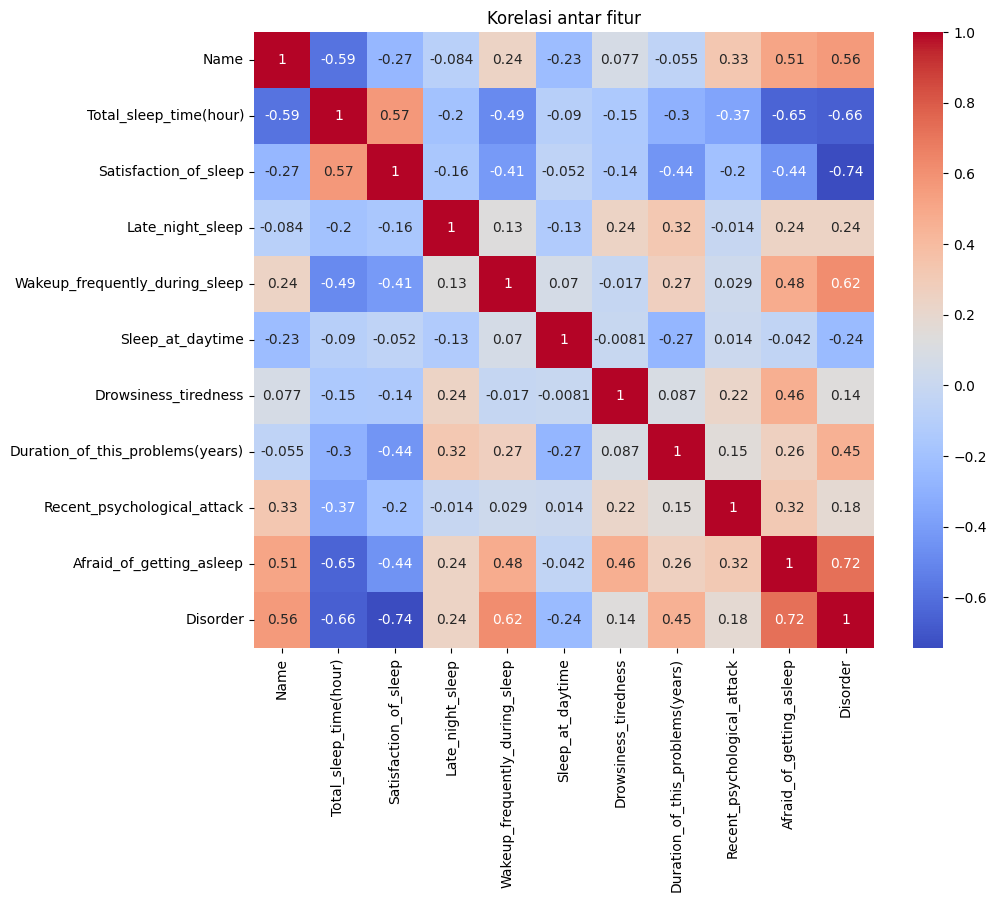

In [23]:
## Step4: Visualisasi Awal

# Step4.1: Korelasi Fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()

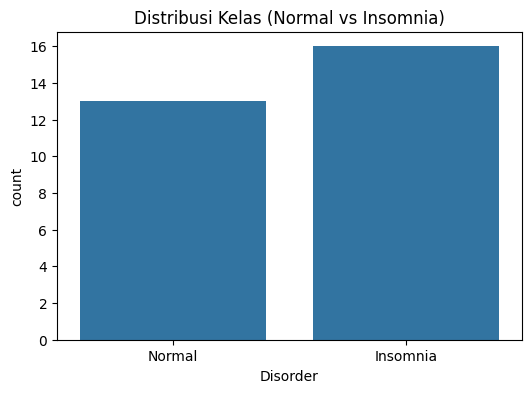

In [24]:
# Step4.2: Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Disorder', data=df)
plt.title("Distribusi Kelas (Normal vs Insomnia)")
plt.xticks([0, 1], ['Normal', 'Insomnia'])
plt.show()

In [25]:
## Step5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nUkuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")


Ukuran X_train: (20, 10)
Ukuran X_test: (9, 10)
Ukuran y_train: (20,)
Ukuran y_test: (9,)


In [26]:
## Step 6: Modeling, Melatih 4 algoritma machine learning untuk prediksi gangguan insomnia: Logistic Regression, Decision Tree, Random Forest, dan SVM.

# Step6.1: Logistic Regression
log_model = LogisticRegression(random_state=42) # Tambahkan random_state untuk konsistensi
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1] # Untuk ROC Curve

In [27]:
# Step6.2: Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_prob = tree_model.predict_proba(X_test)[:, 1] # Untuk ROC Curve

In [28]:
# Step6.3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1] # Untuk ROC Curve

In [29]:
# Step6.4: SVM
svm_model = SVC(probability=True, random_state=42) # probability=True diperlukan untuk predict_proba
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_prob = svm_model.predict_proba(X_test)[:, 1] # Untuk ROC Curve


--- Logistic Regression ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



<Figure size 1500x1000 with 0 Axes>

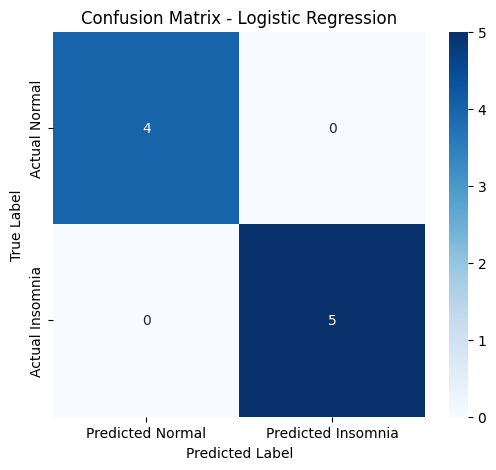

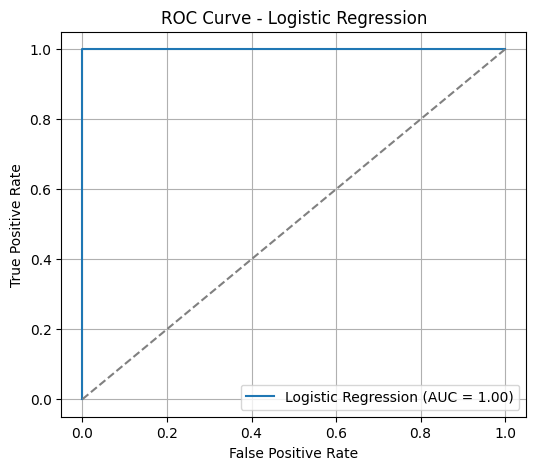


--- Decision Tree ---
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



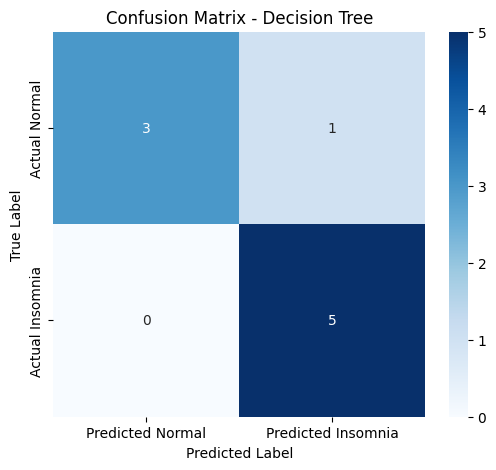

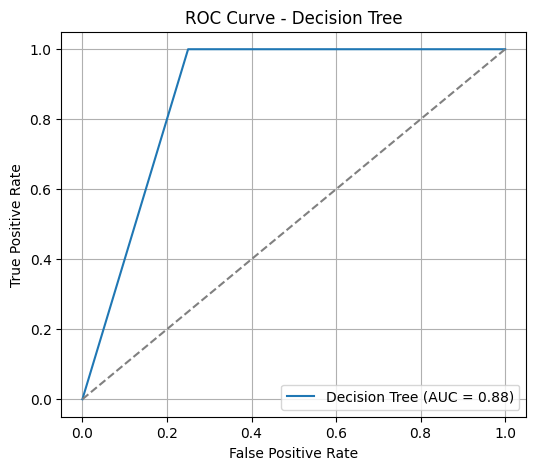


--- Random Forest ---
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



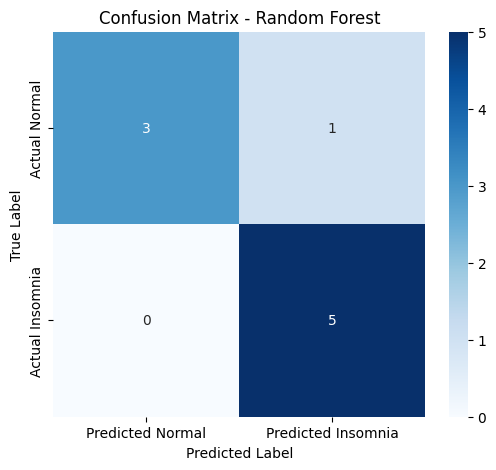

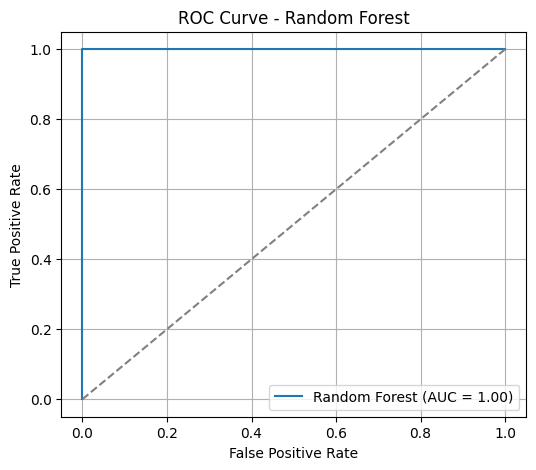


--- SVM ---
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



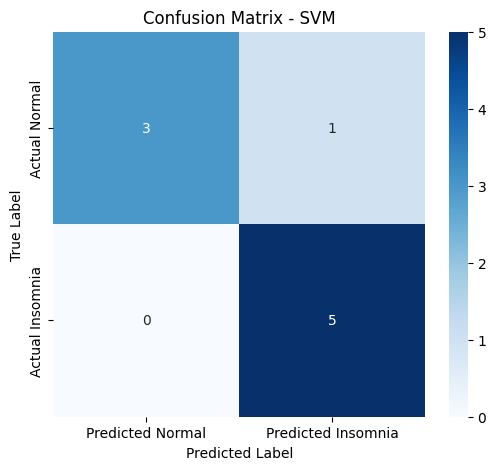

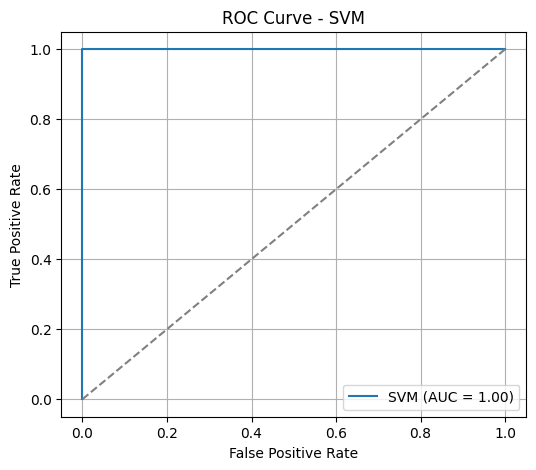


--- Ringkasan Akurasi Semua Model ---
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 0.89
Random Forest Accuracy: 0.89
SVM Accuracy: 0.89


In [30]:
## Step7: Evaluasi Model

models = {
    'Logistic Regression': {'predictor': log_model, 'prediction': log_pred, 'probability': log_prob},
    'Decision Tree': {'predictor': tree_model, 'prediction': tree_pred, 'probability': tree_prob},
    'Random Forest': {'predictor': rf_model, 'prediction': rf_pred, 'probability': rf_prob},
    'SVM': {'predictor': svm_model, 'prediction': svm_pred, 'probability': svm_prob}
}

# Step7.1: Tabel Akurasi, Classification Report, dan Confusion Matrix untuk Setiap Model
plt.figure(figsize=(15, 10)) # Ukuran figure untuk ROC Curves
for i, (name, data) in enumerate(models.items()):
    pred = data['prediction']
    prob = data['probability']

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Normal', 'Predicted Insomnia'],
                yticklabels=['Actual Normal', 'Actual Insomnia'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    auc_score = roc_auc_score(y_test, prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Garis acak
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n--- Ringkasan Akurasi Semua Model ---")
for name, data in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, data['prediction']):.2f}")



--- Analisis Feature Importance ---


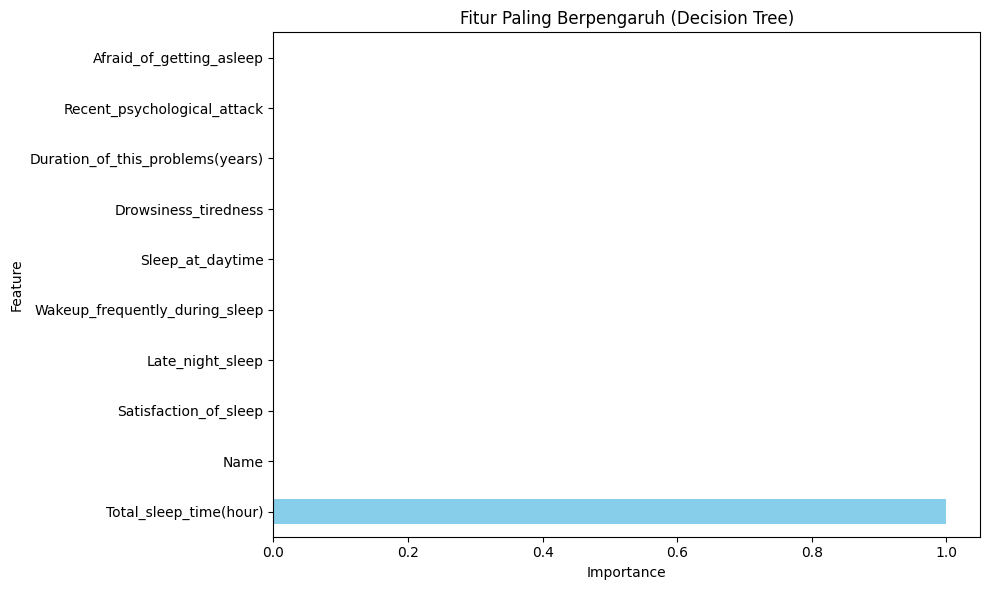


Feature Importance (Decision Tree):
 Total_sleep_time(hour)              1.0
Name                                0.0
Satisfaction_of_sleep               0.0
Late_night_sleep                    0.0
Wakeup_frequently_during_sleep      0.0
Sleep_at_daytime                    0.0
Drowsiness_tiredness                0.0
Duration_of_this_problems(years)    0.0
Recent_psychological_attack         0.0
Afraid_of_getting_asleep            0.0
dtype: float64


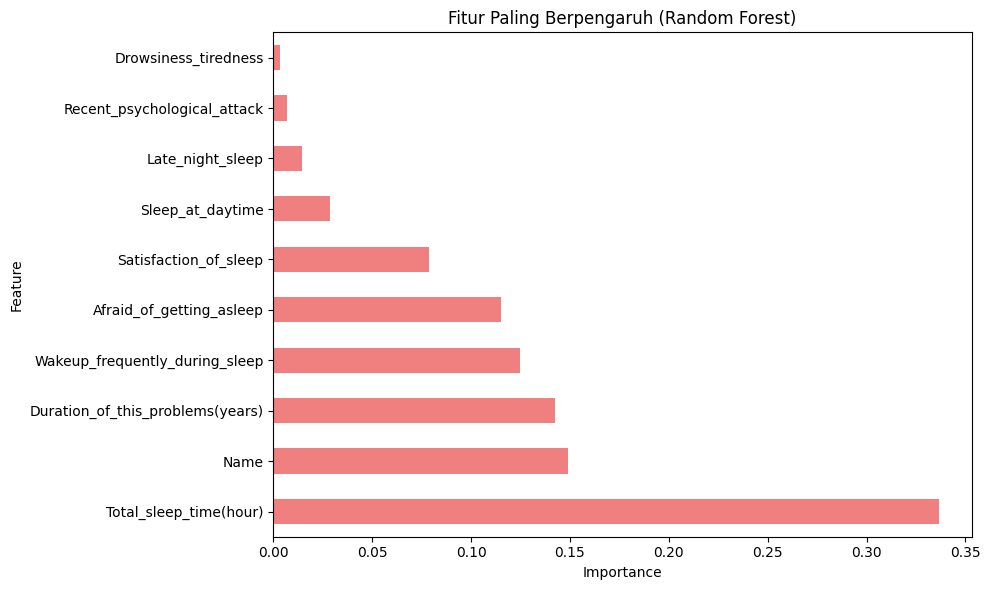


Feature Importance (Random Forest):
 Total_sleep_time(hour)              0.336494
Name                                0.148800
Duration_of_this_problems(years)    0.142285
Wakeup_frequently_during_sleep      0.124940
Afraid_of_getting_asleep            0.115066
Satisfaction_of_sleep               0.078934
Sleep_at_daytime                    0.028632
Late_night_sleep                    0.014622
Recent_psychological_attack         0.006946
Drowsiness_tiredness                0.003280
dtype: float64


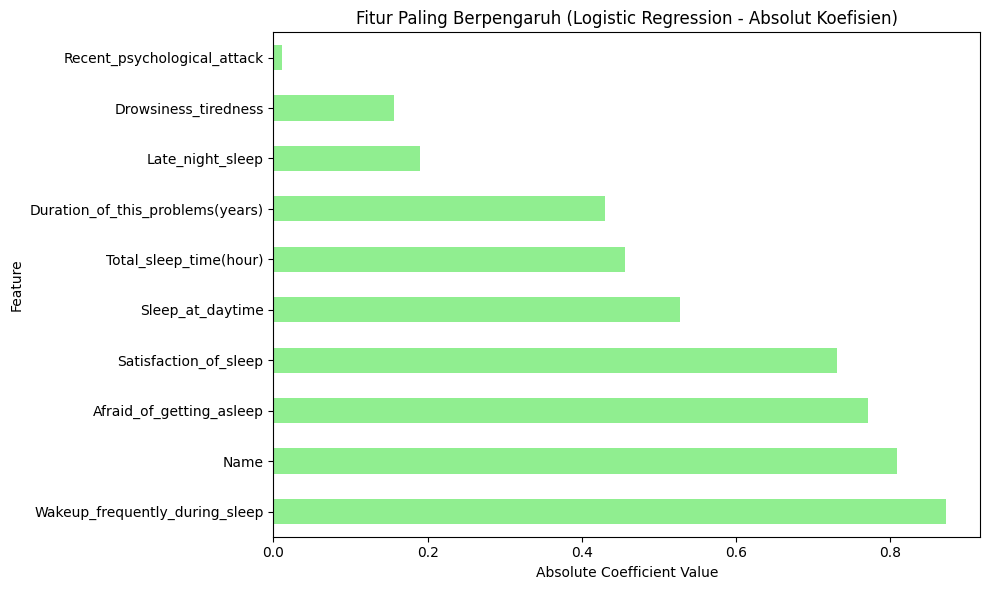


Feature Importance (Logistic Regression - Absolute Coefficients):
 Wakeup_frequently_during_sleep      0.872887
Name                                0.808936
Afraid_of_getting_asleep            0.770940
Satisfaction_of_sleep               0.730846
Sleep_at_daytime                    0.526979
Total_sleep_time(hour)              0.456607
Duration_of_this_problems(years)    0.429834
Late_night_sleep                    0.190354
Drowsiness_tiredness                0.156493
Recent_psychological_attack         0.011353
dtype: float64

Catatan: Feature Importance untuk SVM dengan kernel non-linear (default) tidak mudah diinterpretasikan secara langsung.
Jika Anda menggunakan kernel linear (SVC(kernel='linear')), Anda bisa menggunakan model.coef_ untuk analisis importance.


In [31]:
## Step8: Feature Importance (untuk model yang mendukung)

print("\n--- Analisis Feature Importance ---")

# Decision Tree Feature Importance
if 'Decision Tree' in models and hasattr(tree_model, 'feature_importances_'):
    importances = tree_model.feature_importances_
    feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feat_imp.plot(kind='barh', color='skyblue')
    plt.title("Fitur Paling Berpengaruh (Decision Tree)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print("\nFeature Importance (Decision Tree):\n", feat_imp)

# Random Forest Feature Importance
if 'Random Forest' in models and hasattr(rf_model, 'feature_importances_'):
    importances = rf_model.feature_importances_
    feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feat_imp.plot(kind='barh', color='lightcoral')
    plt.title("Fitur Paling Berpengaruh (Random Forest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print("\nFeature Importance (Random Forest):\n", feat_imp)

# Logistic Regression Feature Importance (Koefisien absolut)
if 'Logistic Regression' in models and hasattr(log_model, 'coef_'):
    # Koefisien untuk kelas positif (biasanya kelas 1)
    coefs = log_model.coef_[0]
    # Ambil nilai absolut untuk mengukur magnitude kepentingan
    abs_coefs = np.abs(coefs)
    feat_imp_lr = pd.Series(abs_coefs, index=feat_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feat_imp_lr.plot(kind='barh', color='lightgreen')
    plt.title("Fitur Paling Berpengaruh (Logistic Regression - Absolut Koefisien)")
    plt.xlabel("Absolute Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print("\nFeature Importance (Logistic Regression - Absolute Coefficients):\n", feat_imp_lr)

# SVM Feature Importance (Catatan)
if 'SVM' in models:
    print("\nCatatan: Feature Importance untuk SVM dengan kernel non-linear (default) tidak mudah diinterpretasikan secara langsung.")
    print("Jika Anda menggunakan kernel linear (SVC(kernel='linear')), Anda bisa menggunakan model.coef_ untuk analisis importance.")
